# IMPORTING LIBRARIES.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET.

In [ ]:
data=pd.read_csv('covid_19_clean_complete (13).csv',parse_dates=['Date'])

# UNDERSTANDING THE DATA.

In [ ]:
#CHEKCING SHAPE OF DATAFRAME
data.shape

(49068, 10)

In [ ]:
#CHECKING TOP 5 ROWS OF DATA
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
#CHECKING INFO ABOUT THE DATASET.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#CHECKING FOR DUPLICATES
data.duplicated().any()

False

### THERE ARE NO DUPLICATE IN DATAFRAME.

## RENAMING COLUMNS.

In [ ]:
data.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [ ]:
data.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

# DATA VISUALIZATION.

### CALCULATING TOTAL NUMBER OF CONFIRMED , DEATH , RECOVERED  AND ACTIVE


In [ ]:
F1=pd.DataFrame(data[['Confirmed','Deaths','Recovered','Active']].sum())

In [ ]:
F1

,0
Confirmed,828508482
Deaths,43384903
Recovered,388408229
Active,396715350


In [ ]:
sns.set()

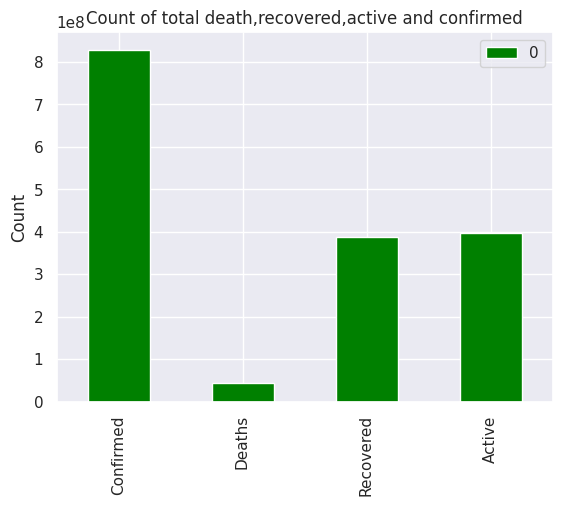

In [ ]:
F1.plot(kind='bar',color='green')
plt.ylabel('Count')
plt.title('Count of total death,recovered,active and confirmed')
plt.show()

### TOP 20 COUNTRIES ACCOURDING TO NUMBER OF ACTIVE AND CONFIRMED CASES.

In [ ]:
df1=data.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
p1=df1.sort_values(by='Active',ascending=False).head(20)

In [ ]:
p2=df1.sort_values(by='Confirmed',ascending=False).head(20)

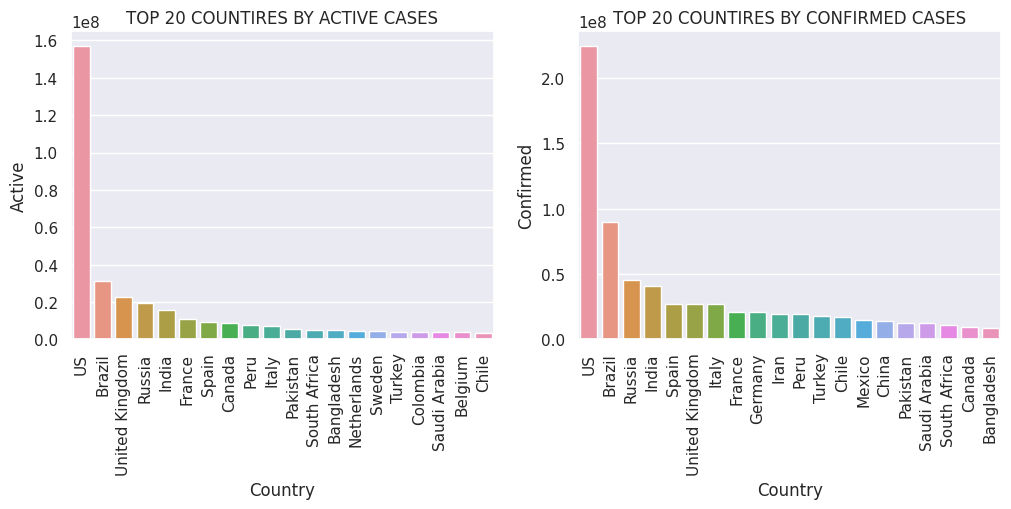

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='Country',y='Active',data=p1)
plt.xticks(rotation=90)
plt.title('TOP 20 COUNTIRES BY ACTIVE CASES')

plt.subplot(1,2,2)
sns.barplot(x='Country',y='Confirmed',data=p2)
plt.xticks(rotation=90)
plt.title('TOP 20 COUNTIRES BY CONFIRMED CASES')
plt.show()

### TOP 20 COUNTRIES ACCOURDING TO NUMBER OF DEATHS AND RECOVERED CASES.

In [ ]:
p3=df1.sort_values(by='Deaths',ascending=False).head(20)
p4=df1.sort_values(by='Recovered',ascending=False).head(20)

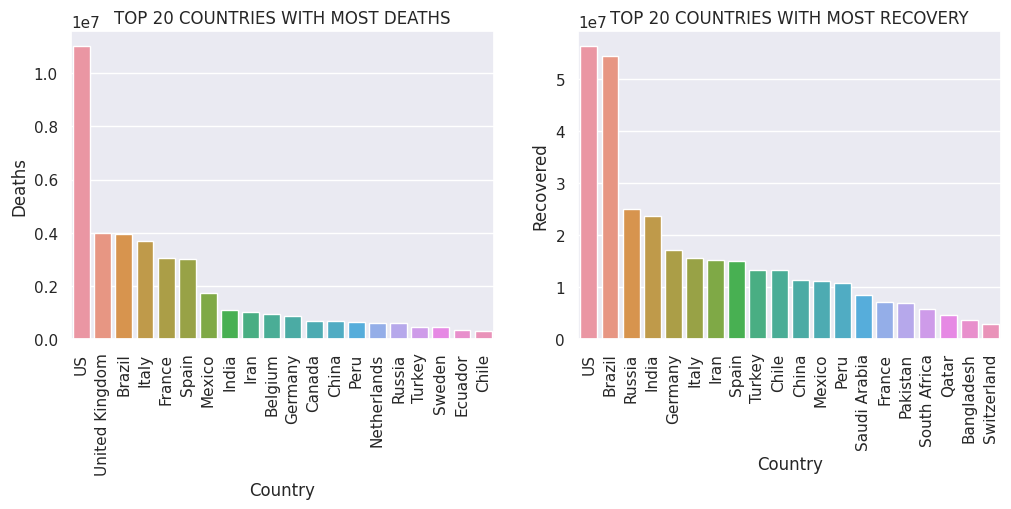

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='Country',y='Deaths',data=p3)
plt.xticks(rotation=90)
plt.title('TOP 20 COUNTRIES WITH MOST DEATHS')

plt.subplot(1,2,2)
sns.barplot(x='Country',y='Recovered',data=p4)
plt.xticks(rotation=90)
plt.title('TOP 20 COUNTRIES WITH MOST RECOVERY')

plt.show()

# CENSUS ACCOURDING TO WHO REGION.

In [ ]:
df2=data.groupby('WHO Region')['Confirmed','Deaths','Recovered','Active'].sum()

In [ ]:
df2

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,21791827,439978,11193730,10158119
Americas,402261194,19359292,157069444,225832458
Eastern Mediterranean,74082892,1924029,48050703,24108160
Europe,248879793,19271040,123202075,106406678
South-East Asia,55118365,1458134,30030327,23629904
Western Pacific,26374411,932430,18861950,6580031


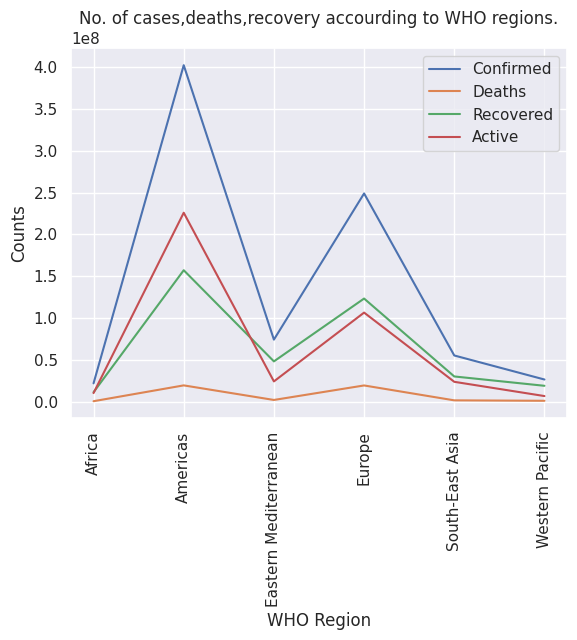

In [ ]:
df2.plot()
plt.xticks(rotation=90)
plt.title('No. of cases,deaths,recovery accourding to WHO regions.')
plt.ylabel('Counts')
plt.show()


# CHOROPLETH  FOR ACTIVE CASES.

In [ ]:
df3=data.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

In [ ]:
df3

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
fig1=px.choropleth(df3,locations='Country',locationmode='country names',color='Active',hover_name='Country',
                 range_color=[1,2000000],color_continuous_scale="Peach",title='Active cases Countries')
fig1.show()

#  CHOROPLETH  FOR CONFIRMED CASES.

In [ ]:
fig2=px.choropleth(df3,locations='Country',locationmode='country names',color='Confirmed',hover_name='Country',
                 range_color=[1,2000000],color_continuous_scale="Peach",title='Confirmed Cases')
fig2.show()

# CHOROPLETH  FOR RECOVERED CASES.

In [ ]:
fig3=px.choropleth(df3,locations='Country',locationmode='country names',color='Recovered',hover_name='Country',
                 range_color=[1,2000000],color_continuous_scale="Peach",title='Recovered Cases')
fig3.show()

#  CHOROPLETH  FOR DEATHS.


In [ ]:
fig4=px.choropleth(df3,locations='Country',locationmode='country names',color='Deaths',hover_name='Country',
                 range_color=[1,2000000],color_continuous_scale="Peach",title='Deaths')
fig4.show()

# ANALYSING FIGURES TREND MONTHLY.

In [ ]:
d1=data.groupby('Date')['Active'].sum()
d2=data.groupby('Date')['Confirmed'].sum()
d3=data.groupby('Date')['Deaths'].sum()
d4=data.groupby('Date')['Recovered'].sum()

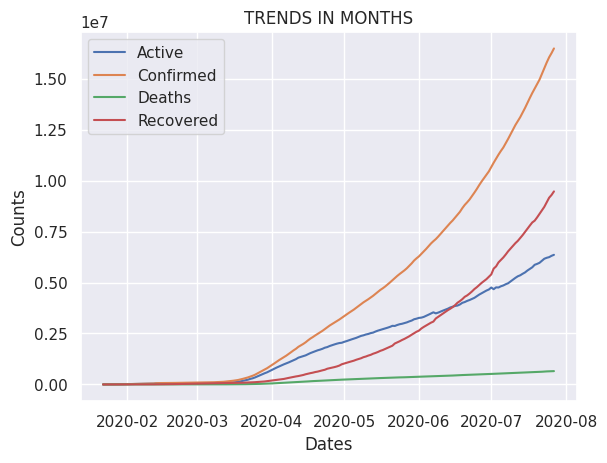

In [ ]:
plt.plot(d1, label='Active')
plt.plot(d2, label='Confirmed')
plt.plot(d3, label='Deaths')
plt.plot(d4, label='Recovered')
plt.legend(loc='best')
plt.title('TRENDS IN MONTHS')
plt.ylabel('Counts')
plt.xlabel('Dates')
plt.show()

# ANALYSIS FOR INDIA.

### PLOTTING FOR EACXH TYPE OF COVID CASES IN INDIA

In [ ]:
india=data[data['Country']=='India']

In [ ]:
idf1=pd.DataFrame(india[['Confirmed','Active','Deaths',"Recovered"]].sum())

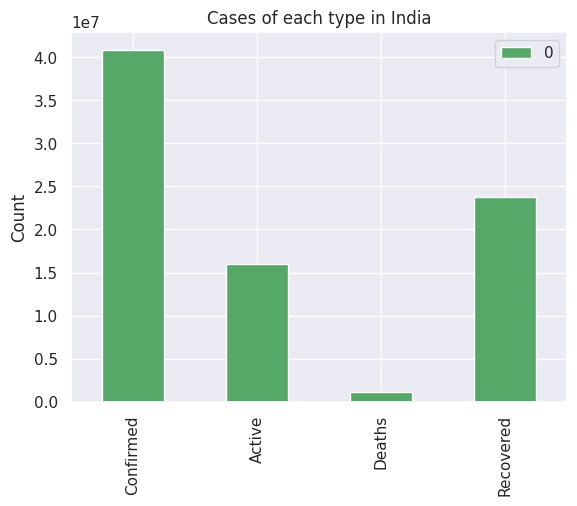

In [ ]:
idf1.plot(kind='bar',color='g')
plt.title('Cases of each type in India')
plt.ylabel('Count')
plt.show()

### PLOTTING TREND OF EACH TYPE OF CASES BY WEEK NUMBER IN INDIA.

In [ ]:
india['Week_number']=india['Date'].dt.week

In [ ]:
i1=india.groupby('Week_number')['Active'].sum()
i2=india.groupby('Week_number')['Confirmed'].sum()
i3=india.groupby('Week_number')['Deaths'].sum()
i4=india.groupby('Week_number')['Recovered'].sum()

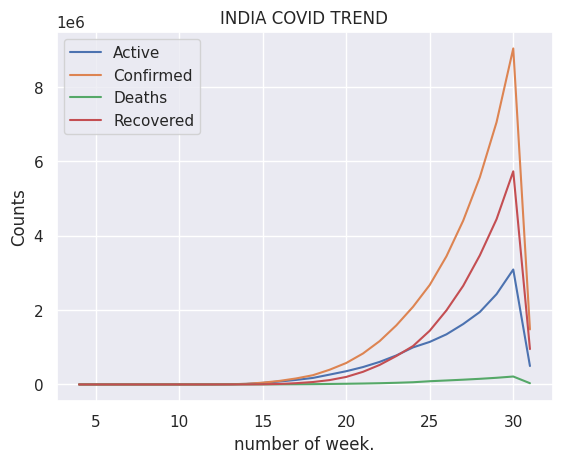

In [ ]:
plt.plot(i1, label='Active')
plt.plot(i2, label='Confirmed')
plt.plot(i3, label='Deaths')
plt.plot(i4, label='Recovered')
plt.legend(loc='best')
plt.title('INDIA COVID TREND')
plt.ylabel('Counts')
plt.xlabel('number of week.')
plt.show()

# FORECASTING USING FB PROPHET

**INSTALLING FB PROPHET LIBRARY FOR FORECASTING**

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:
data.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
data.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().head()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,555,17,28,510
2020-01-23,654,18,30,606
2020-01-24,941,26,36,879
2020-01-25,1434,42,39,1353
2020-01-26,2118,56,52,2010


In [ ]:
#CREATING DIFFERENT DATAFRAME FOR  COMFIRMED, DEAD, ACTIVE, RECOVERED

confirmed= data.groupby('Date')['Confirmed'].sum().reset_index()
dead=data.groupby('Date')['Deaths'].sum().reset_index()
recovered= data.groupby('Date')['Recovered'].sum().reset_index()
active= data.groupby('Date')['Active'].sum().reset_index()

In [ ]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
dead.head()

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [ ]:
recovered.head()

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [ ]:
active.head()

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010


## **FORECASTING FOR CONFIRMED CASES FOR NEXT 14 DAYS**

In [ ]:
#renaming date and output column.

confirmed.columns=['ds','y']

In [ ]:
#coverting [ds] columns to datetime.

confirmed['ds']= pd.to_datetime(confirmed['ds'])

In [ ]:
print(confirmed.tail())
print('#'*30)
print('shape of dataframe is.',confirmed.shape)

            ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485
##############################
shape of dataframe is. (188, 2)


In [ ]:
#training the model.

m=Prophet(interval_width=0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/it_ruv6h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/clcrmbuy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49768', 'data', 'file=/tmp/tmpduig9n5k/it_ruv6h.json', 'init=/tmp/tmpduig9n5k/clcrmbuy.json', 'output', 'file=/tmp/tmpduig9n5k/prophet_modelb0jqo1l_/prophet_model-20230522120149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#specifying for how many future terms we need prediction.
future=m.make_future_dataframe(periods=14,freq='D')
future.shape

(202, 1)

In [ ]:
#forecasting future
forecast=m.predict(future)

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-10622.035153,-188073.944938,145576.232349,-10622.035153,-10622.035153,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,-11022.919838,0.0,0.0,0.0,-21644.954991
1,2020-01-23,-7870.816477,-168528.265172,153159.450556,-7870.816477,-7870.816477,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,-1082.195992,0.0,0.0,0.0,-8953.012469
2,2020-01-24,-5119.597801,-161080.105295,168994.228678,-5119.597801,-5119.597801,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,10096.194723,0.0,0.0,0.0,4976.596922
3,2020-01-25,-2368.379125,-150055.110333,163177.001364,-2368.379125,-2368.379125,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,13721.169479,0.0,0.0,0.0,11352.790355
4,2020-01-26,382.839551,-154534.238291,156693.345171,382.839551,382.839551,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,7245.350392,0.0,0.0,0.0,7628.189943


In [ ]:
f1=forecast[['ds','yhat_lower','yhat_upper','yhat']]

In [ ]:
f1[['yhat_lower','yhat_upper','yhat']]=f1[['yhat_lower','yhat_upper','yhat']].astype(int)

In [ ]:
f1

,ds,yhat_lower,yhat_upper,yhat
0,2020-01-22,-188073,145576,-21644
1,2020-01-23,-168528,153159,-8953
2,2020-01-24,-161080,168994,4976
3,2020-01-25,-150055,163177,11352
4,2020-01-26,-154534,156693,7628
...,...,...,...,...
197,2020-08-06,17954103,18397708,18171801
198,2020-08-07,18147147,18643032,18386972
199,2020-08-08,18337780,18845016,18594588
200,2020-08-09,18519390,19091905,18792104


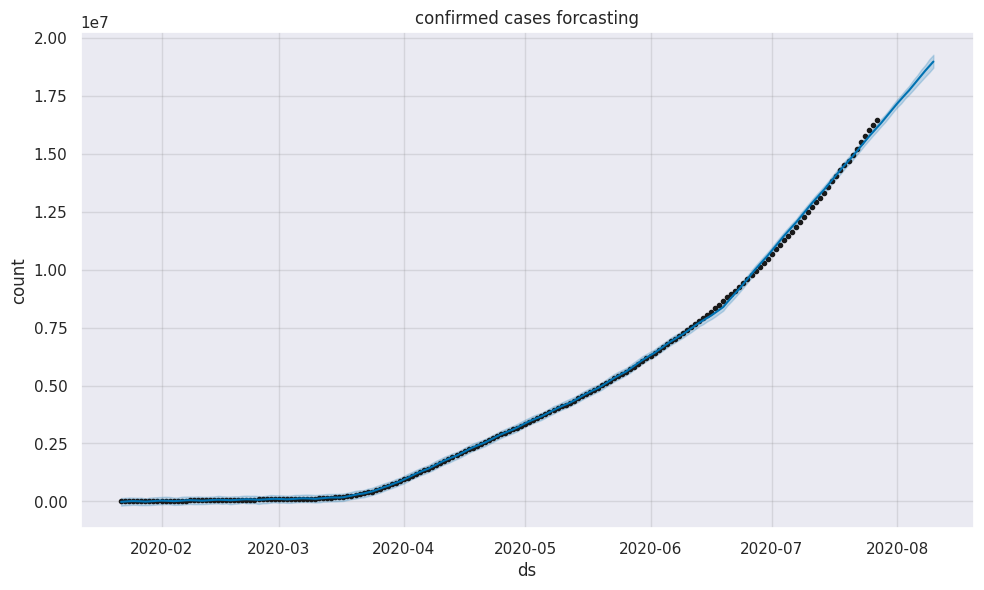

In [ ]:
sns.set()
m.plot(forecast)
plt.title('confirmed cases forcasting')
plt.ylabel('count')
plt.show()

In [ ]:
#looking for future terms
f1[['ds','yhat']].tail(14)

,ds,yhat
188,2020-07-28,16320122
189,2020-07-29,16529927
190,2020-07-30,16743859
191,2020-07-31,16959029
192,2020-08-01,17166646
193,2020-08-02,17364162
194,2020-08-03,17558787
195,2020-08-04,17748064
196,2020-08-05,17957869
197,2020-08-06,18171801


**CHECKING FOR ACCURACY**

In [ ]:
q1=f1.iloc[0:188]['yhat']

In [ ]:
q2=confirmed['y']

In [ ]:
from sklearn.metrics import r2_score , d2_absolute_error_score,d2_tweedie_score

In [ ]:
print('accuracy of model is',r2_score(q1,q2))

accuracy of model is 0.9996979888197284


In [ ]:
print('absolute errore score',d2_absolute_error_score(q1,q2))

absolute errore score 0.9888146392184026


## **PREDICTING DEATH COUNTS FOR THE NEXT 14 DAYS.**

In [ ]:
print(dead.head())
print('*'*30)
print('shape of dataframe is.',dead.shape)

        Date  Deaths
0 2020-01-22      17
1 2020-01-23      18
2 2020-01-24      26
3 2020-01-25      42
4 2020-01-26      56
******************************
shape of dataframe is. (188, 2)


In [ ]:
#Renaming the columns of the dataframe.
dead.columns=['ds','y']
dead['ds']=pd.to_datetime(dead['ds'])
dead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
#Training the model.
n=Prophet()
n.fit(dead)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/wwlt5wsq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/4hn6smuv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11450', 'data', 'file=/tmp/tmpduig9n5k/wwlt5wsq.json', 'init=/tmp/tmpduig9n5k/4hn6smuv.json', 'output', 'file=/tmp/tmpduig9n5k/prophet_model0qxrfiek/prophet_model-20230522120151.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Specifying the number of future terms we need to predict.
future1=n.make_future_dataframe(periods=14,freq='D')
print('shape of future is',future.shape)

shape of future is (202, 1)


In [ ]:
#forecasting the future
forecast1=n.predict(future1)
f2=forecast1[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
f2[['yhat','yhat_lower','yhat_upper']]=f2[['yhat','yhat_lower','yhat_upper']].astype('int')

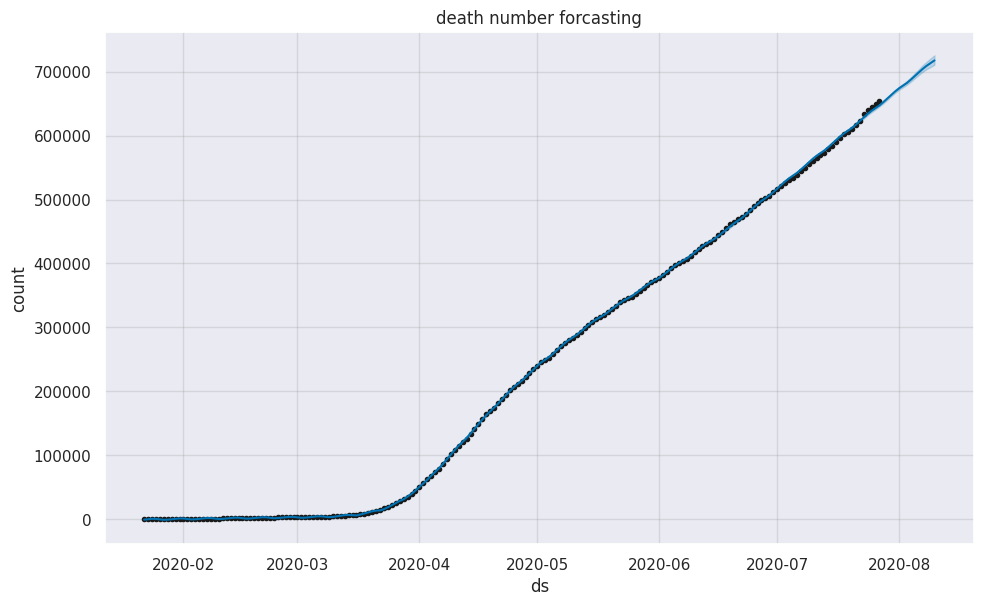

In [ ]:
  #plotting the future prediction.
  sns.set()
  n.plot(forecast1)
  plt.title('death number forcasting')
  plt.ylabel('count')
  plt.show()

In [ ]:
#Checking for number of deaths.
f2[['ds','yhat']].tail(20)

,ds,yhat
182,2020-07-22,622685
183,2020-07-23,628295
184,2020-07-24,633812
185,2020-07-25,638695
186,2020-07-26,642832
187,2020-07-27,647123
188,2020-07-28,652331
189,2020-07-29,657897
190,2020-07-30,663508
191,2020-07-31,669024


**CHECKING FOR ACCURACY OF MODEL.**

In [ ]:
q1=f2.iloc[0:188]['yhat']


In [ ]:
q2=dead['y']

In [ ]:
from sklearn.metrics import r2_score , d2_
print('accuracy of model is',r2_score(q1,q2))

accuracy of model is 0.9999505205303779
absolute errore score 0.9949236989571784


# **PREDICTING RECOVERY COUNT FOR NEXT 14 DAYS**

In [ ]:
print(recovered.head())
print('*'*30)
print('Shape of dataframe is',recovered.shape)

        Date  Recovered
0 2020-01-22         28
1 2020-01-23         30
2 2020-01-24         36
3 2020-01-25         39
4 2020-01-26         52
******************************
Shape of dataframe is (188, 2)


In [ ]:
#Renaming the columns.
recovered.columns=['ds','y']
recovered['ds']=pd.to_datetime(recovered['ds'])
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
#Training the model.
o=Prophet()
o.fit(recovered)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/_7gcumy9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/qe_scbmk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28189', 'data', 'file=/tmp/tmpduig9n5k/_7gcumy9.json', 'init=/tmp/tmpduig9n5k/qe_scbmk.json', 'output', 'file=/tmp/tmpduig9n5k/prophet_models8lfmny1/prophet_model-20230522120152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Specifying the number of units for which we need predictions.
future2=o.make_future_dataframe(periods=14,freq='D')
future2.shape

(202, 1)

In [ ]:
#forecasting the future
forecast2=o.predict(future2)
f3=forecast2[['ds','yhat','yhat_lower','yhat_upper']]

In [ ]:
f3[['yhat','yhat_lower','yhat_upper']]=f3[['yhat','yhat_lower','yhat_upper']].astype('int')


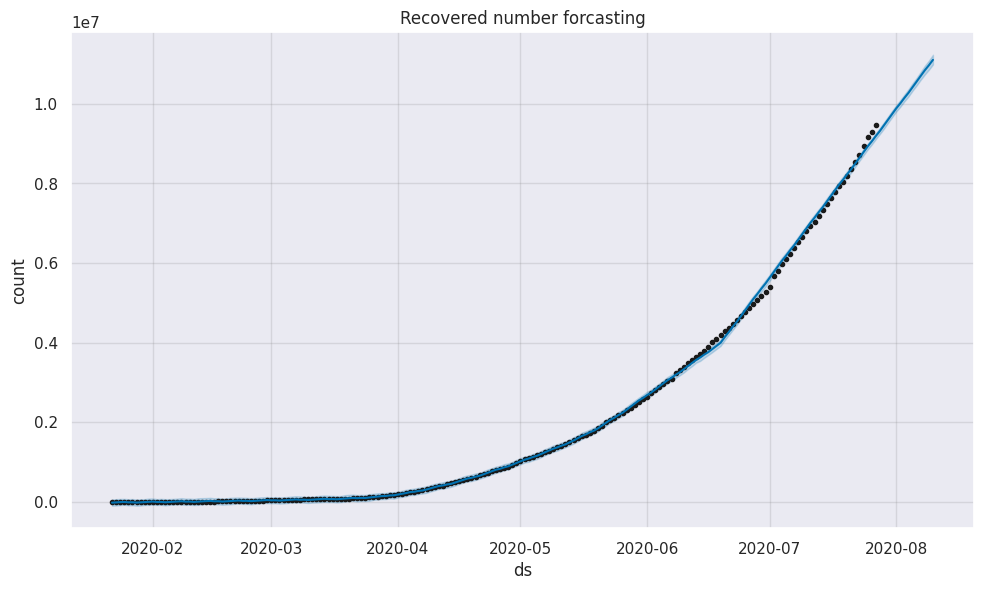

In [ ]:

#plotting the future prediction.
sns.set()
o.plot(forecast2)
plt.title('Recovered number forcasting')
plt.ylabel('count')
plt.show()

In [ ]:
#Checking for number of .
f3[['ds','yhat']].tail(20)

,ds,yhat
182,2020-07-22,8500023
183,2020-07-23,8642893
184,2020-07-24,8784515
185,2020-07-25,8924909
186,2020-07-26,9051040
187,2020-07-27,9187694
188,2020-07-28,9315214
189,2020-07-29,9457530
190,2020-07-30,9600400
191,2020-07-31,9742022


**CHECKING FOR ACCURACY OF MODEL**

In [ ]:
q1=f3.iloc[0:188]['yhat']
q2=recovered['y']

In [ ]:
from sklearn.metrics import r2_score , d2_absolute_error_score
print('accuracy of model is',r2_score(q1,q2))

accuracy of model is 0.9994544974159956
absolute errore score 0.9833498855307815


# **PREDICTING NUMBER OF ACTIVE CASES FOR NEXT 14 DAYS**

In [ ]:
print(active.head())
print('*'*30)
print('shape of dataframe is.',active.shape)

        Date  Active
0 2020-01-22     510
1 2020-01-23     606
2 2020-01-24     879
3 2020-01-25    1353
4 2020-01-26    2010
******************************
shape of dataframe is. (188, 2)


In [ ]:
#Renaming the columns of the dataframe.
active.columns=['ds','y']
active['ds']=pd.to_datetime(active['ds'])
active.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


In [ ]:
#Training the model.
p=Prophet()
p.fit(active)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/xsomz39n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpduig9n5k/6_3o8vlp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78245', 'data', 'file=/tmp/tmpduig9n5k/xsomz39n.json', 'init=/tmp/tmpduig9n5k/6_3o8vlp.json', 'output', 'file=/tmp/tmpduig9n5k/prophet_modelm9vy4s5l/prophet_model-20230522120154.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Specifying the number of future terms we need to predict.
future3=p.make_future_dataframe(periods=14,freq='D')
print('shape of future is',future3.shape)

shape of future is (202, 1)


In [ ]:
#forecasting the future
forecast3=p.predict(future3)
f4=forecast3[['ds','yhat','yhat_lower','yhat_upper']]


In [ ]:
f4[['yhat','yhat_lower','yhat_upper']]=f4[['yhat','yhat_lower','yhat_upper']].astype('int')


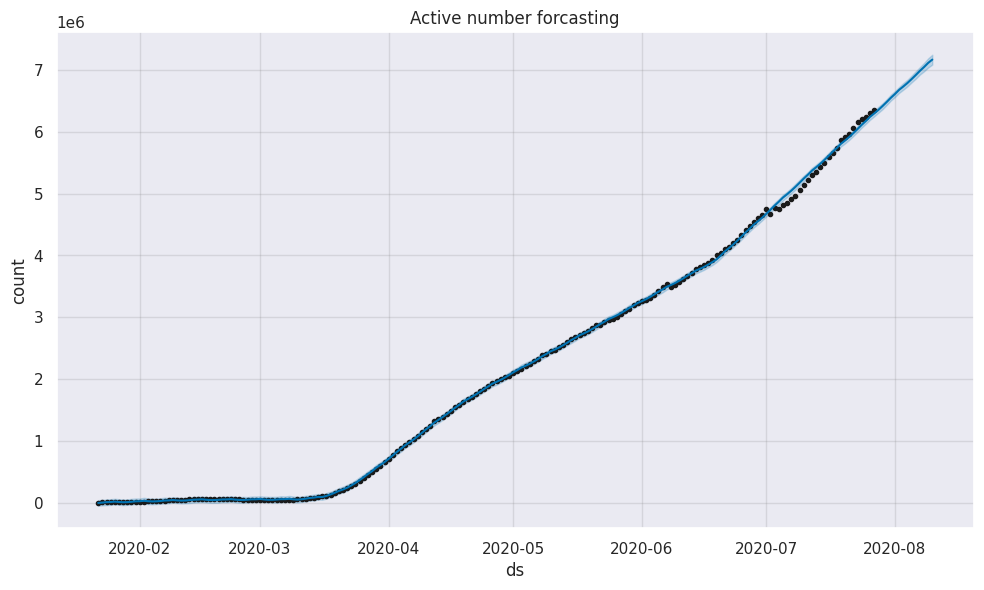

In [ ]:
#plotting the future prediction.
sns.set()
p.plot(forecast3)
plt.title('Active number forcasting')
plt.ylabel('count')
plt.show()


In [ ]:
#Checking for number of Active cases.
f4[['ds','yhat']].tail(20)

,ds,yhat
182,2020-07-22,5979903
183,2020-07-23,6045363
184,2020-07-24,6113406
185,2020-07-25,6175571
186,2020-07-26,6242873
187,2020-07-27,6296626
188,2020-07-28,6353391
189,2020-07-29,6415791
190,2020-07-30,6481251
191,2020-07-31,6549294


**CHECKING ACCURACY OF THE MODEL.**

In [ ]:
q1=f4.iloc[0:188]['yhat']
q2=active['y']

In [ ]:
from sklearn.metrics import r2_score , d2_absolute_error_score
print('accuracy of model is',r2_score(q1,q2))


accuracy of model is 0.9996695383876413
absolute errore score 0.9874171814240895


##PREDICTION USING ARIMA MODEL.

**PREDICTING  FOR CONFIRMED CASES, USING ARIMA MODEL.**

In [ ]:
confirmed= pd.DataFrame(data.groupby('Date')['Confirmed'].sum())

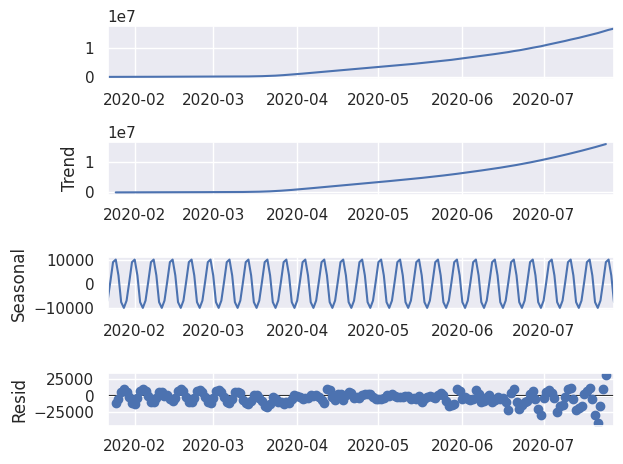

In [ ]:
from  statsmodels.tsa.seasonal import seasonal_decompose
decompose_result= seasonal_decompose(confirmed)
decompose_result.plot()
plt.show()

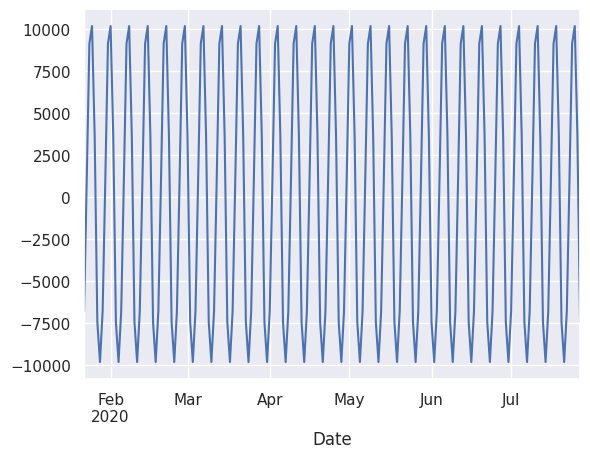

In [ ]:
decompose_result.seasonal.plot()
plt.show()

In [ ]:
##SEASONALITY =7 OR 8

In [ ]:
mean_= confirmed['Confirmed'].rolling(window=8).mean()
std_= confirmed['Confirmed'].rolling(window=8).std()

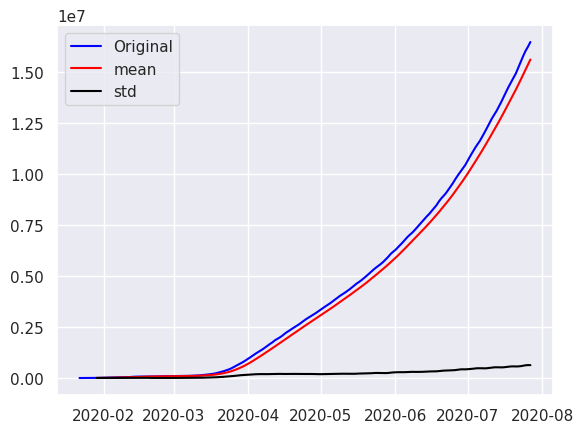

In [ ]:
plt.plot(confirmed,color='blue',label='Original')
plt.plot(mean_,color='red',label='mean')
plt.plot(std_,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.
from statsmodels.tsa.stattools import adfuller
result = adfuller(confirmed)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.9987419829144141
The series is not stationary


In [ ]:
## OUR DATA IS NOT STATIONARY , WE WILL TRY TO MAKE IT STATIONARY. USING LOG METHOD.

In [ ]:
log_data=np.log(confirmed)

log_mean= log_data.rolling(window=8).mean()
log_std= log_data.rolling(window=8).std()

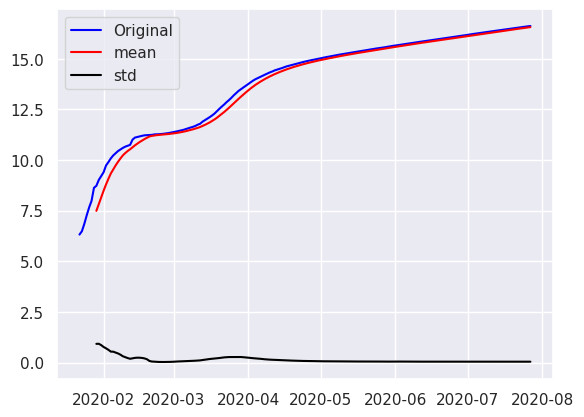

In [ ]:
plt.plot(log_data,color='blue',label='Original')
plt.plot(log_mean,color='red',label='mean')
plt.plot(log_std,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_data)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.007754459360898678
series is stationary


In [ ]:
train= log_data.iloc[:160]['Confirmed']
test= log_data.iloc[160:]['Confirmed']

# ITERTOOLS FOR BEST VALUES OF P,D,Q.

In [ ]:
import itertools
p= range(0,8)
q= range(0,8)
d=range(0,2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
pdq_combination=list(itertools.product(p,d,q))

In [ ]:
rmse=[]
order=[]

for i in pdq_combination:
    model=ARIMA(train, order=i)
    model_fit= model.fit()
    pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
    error= np.square(mean_squared_error(test,pred))
    order.append(i)
    rmse.append(error)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

In [ ]:
results=pd.DataFrame(index=order,data=rmse,columns=['Rmse_score'])

In [ ]:
print('Best value of pdq is.')
results.sort_values('Rmse_score').head(1)

Best value of pdq is.


,Rmse_score
"(6, 1, 6)",4.904283e-09


In [ ]:
## TRAINING THE ARIMA MODEL.
model= ARIMA(train , order=(6,1,6))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
log_data1=log_data.copy()

In [ ]:
log_data['predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

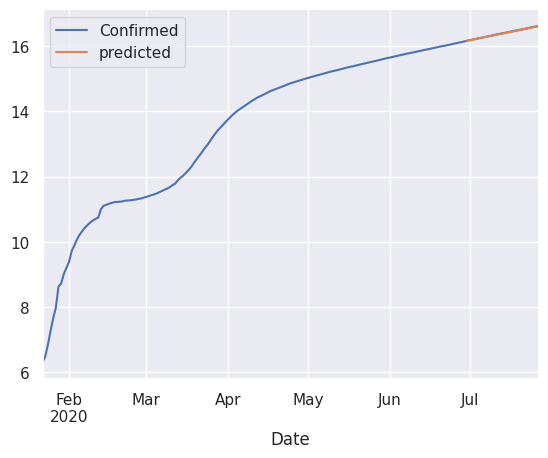

In [ ]:
##PLOTTING THE CONFIRMED AND PREDICTED THINGS.

log_data[['Confirmed','predicted']].plot()
plt.legend(loc='best')
plt.show()

In [ ]:
model1=ARIMA(log_data1, order=(6,1,6))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
model_fit1= model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
##FORECASTING  FOR 30 DAYS
forecast= model_fit1.get_forecast(steps=30)
forecast_values=forecast.predicted_mean
forecast_values

2020-07-28    16.632190
2020-07-29    16.647936
2020-07-30    16.663776
2020-07-31    16.678253
2020-08-01    16.691922
2020-08-02    16.707172
2020-08-03    16.722278
2020-08-04    16.737764
2020-08-05    16.752252
2020-08-06    16.766298
2020-08-07    16.781213
2020-08-08    16.796561
2020-08-09    16.811286
2020-08-10    16.826078
2020-08-11    16.840194
2020-08-12    16.855022
2020-08-13    16.870175
2020-08-14    16.884838
2020-08-15    16.899336
2020-08-16    16.913878
2020-08-17    16.928368
2020-08-18    16.943458
2020-08-19    16.958016
2020-08-20    16.972421
2020-08-21    16.986993
2020-08-22    17.001535
2020-08-23    17.016250
2020-08-24    17.030935
2020-08-25    17.045174
2020-08-26    17.059750
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
index_future_dates= pd.date_range(start='2020-07-28', end='2020-08-26')

In [ ]:
##  TAKING ANTI-LOG TO  SEE ACTUAL VALUES

import math
actual=[]
for i in forecast_values:
  a=math.exp(i)
  actual.append(a)

actual=pd.Series(actual)
actual= (actual).astype(int)
actual.index=index_future_dates

In [ ]:
##FORECASTED VALUES.
actual

2020-07-28    16721235
2020-07-29    16986610
2020-07-30    17257828
2020-07-31    17509481
2020-08-01    17750467
2020-08-02    18023228
2020-08-03    18297564
2020-08-04    18583122
2020-08-05    18854303
2020-08-06    19121005
2020-08-07    19408323
2020-08-08    19708503
2020-08-09    20000867
2020-08-10    20298917
2020-08-11    20587476
2020-08-12    20895023
2020-08-13    21214075
2020-08-14    21527425
2020-08-15    21841801
2020-08-16    22161747
2020-08-17    22485208
2020-08-18    22827078
2020-08-19    23161834
2020-08-20    23497885
2020-08-21    23842809
2020-08-22    24192064
2020-08-23    24550688
2020-08-24    24913875
2020-08-25    25271158
2020-08-26    25642190
Freq: D, dtype: int64

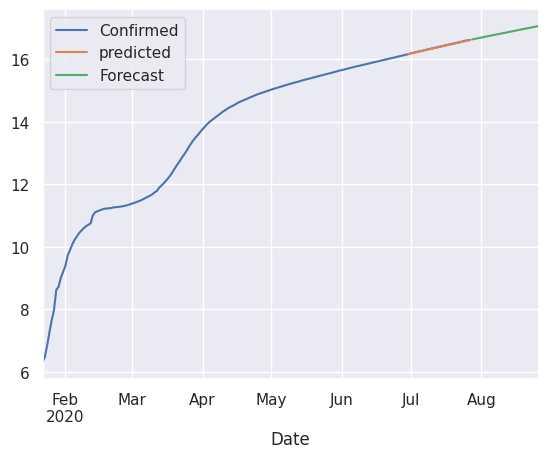

In [ ]:
##PLOTTING FOR COMFIRMED, PREDICTED AND FORECASTED.

log_data[['Confirmed','predicted']].plot()
forecast_values.plot(label='Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
#CHECKING ACCURACY OF MODEL

from sklearn.metrics import mean_squared_error,r2_score

print('Root_mean_sqaured_error is.')
print(np.sqrt(mean_squared_error(log_data['Confirmed'].tail(28),log_data['predicted'].tail(28))))

print('Accuracy of model is.')
r2_score(log_data['Confirmed'].tail(28),log_data['predicted'].tail(28))

Root_mean_sqaured_error is.
0.008368427946607866
Accuracy of model is.


0.9962174342929131

# PREDICTING  FOR DEATH COUNTS USING ARIMA MODEL.

In [ ]:
death= pd.DataFrame(data.groupby('Date')['Deaths'].sum())

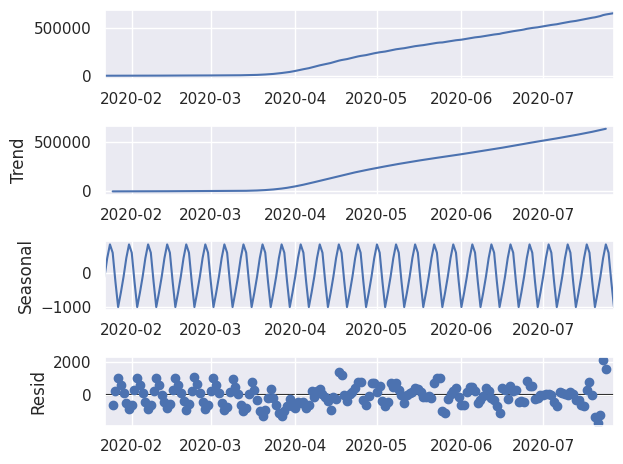

In [ ]:
from  statsmodels.tsa.seasonal import seasonal_decompose
decompose_result= seasonal_decompose(death)
decompose_result.plot()
plt.show()

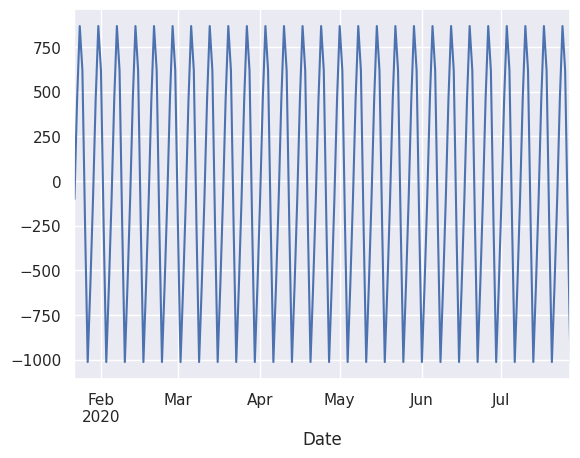

In [ ]:
decompose_result.seasonal.plot()
plt.show()

In [ ]:
##SEAONALITY= 7 OR 8

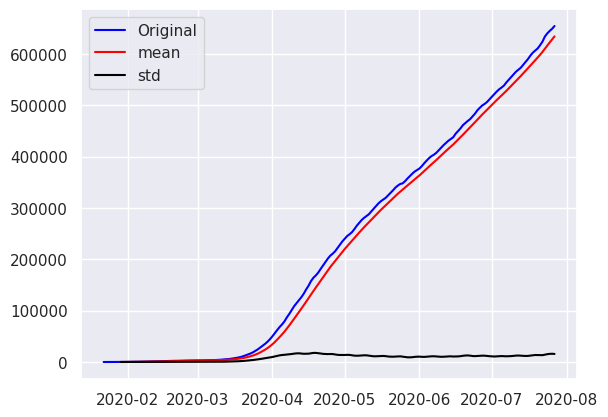

In [ ]:
mean_= death['Deaths'].rolling(window=8).mean()
std_= death['Deaths'].rolling(window=8).std()

plt.plot(death,color='blue',label='Original')
plt.plot(mean_,color='red',label='mean')
plt.plot(std_,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.
from statsmodels.tsa.stattools import adfuller
result = adfuller(death)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.9960683077113273
The series is not stationary


In [ ]:
##OUR SERIES IS NOT STATIONARY, SO WE WILL MAKE IT STATIONARY USING LOG METHOD.

In [ ]:
log_data=np.log(death)

log_mean= log_data.rolling(window=8).mean()
log_std= log_data.rolling(window=8).std()


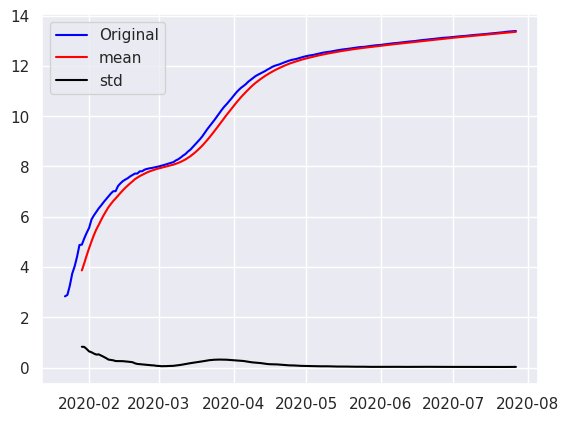

In [ ]:
plt.plot(log_data,color='blue',label='Original')
plt.plot(log_mean,color='red',label='mean')
plt.plot(log_std,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.
from statsmodels.tsa.stattools import adfuller
result = adfuller(log_data)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.00011347774379568498
series is stationary


In [ ]:
train= log_data.iloc[:160]['Deaths']
test= log_data.iloc[160:]['Deaths']

# ITERTOOLS TO FIND THE BEST VALUES OF P,D,Q

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
import itertools
p= range(0,8)
q= range(0,8)
d=range(0,2)

In [ ]:
pdq_combination= list(itertools.product(p,d,q))

In [ ]:
rmse=[]
order=[]

for i in pdq_combination:
    model=ARIMA(train, order=i)
    model_fit= model.fit()
    pred=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
    error= np.square(mean_squared_error(test,pred))
    order.append(i)
    rmse.append(error)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

In [ ]:
results=pd.DataFrame(index=order,data=rmse,columns=['Rmse_score'])

In [ ]:
print('Best value for p,d,q is.')
results.sort_values(by='Rmse_score').head(1)

Best value for p,d,q is.


,Rmse_score
"(7, 1, 7)",9.153448e-10


**TRAINING THE MODEL.**

In [ ]:
model=ARIMA(train, order=(7,1,7))
model_fit= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
log_data1= log_data.copy()

In [ ]:
log_data['predicted']=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

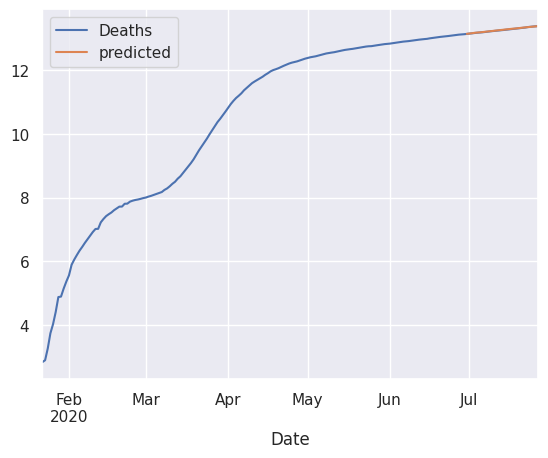

In [ ]:
##PLOTTING THE CONFIRMED AND PREDICTED THINGS.

log_data[['Deaths','predicted']].plot()
plt.legend(loc='best')
plt.show()

In [ ]:
model1=ARIMA(log_data1, order=(7,1,7))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
model_fit1=model1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
## PREDICTING VALUES FOR NEXT 30 DAYS.

forecast= model_fit1.get_forecast(steps=30)
forecast_values=forecast.predicted_mean
forecast_values

2020-07-28    13.400956
2020-07-29    13.415216
2020-07-30    13.426669
2020-07-31    13.437616
2020-08-01    13.442911
2020-08-02    13.447031
2020-08-03    13.457538
2020-08-04    13.467082
2020-08-05    13.479593
2020-08-06    13.491412
2020-08-07    13.497718
2020-08-08    13.504865
2020-08-09    13.512718
2020-08-10    13.520268
2020-08-11    13.532537
2020-08-12    13.542747
2020-08-13    13.551060
2020-08-14    13.559921
2020-08-15    13.566251
2020-08-16    13.574073
2020-08-17    13.584603
2020-08-18    13.593327
2020-08-19    13.603301
2020-08-20    13.612091
2020-08-21    13.618633
2020-08-22    13.627131
2020-08-23    13.635552
2020-08-24    13.643947
2020-08-25    13.654170
2020-08-26    13.662265
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
index_future_dates= pd.date_range(start='2020-07-28', end='2020-08-26')

In [ ]:
#TAKING ANTI-LOG TO FIND THE ACTUAL VALUES.

import math

actual=[]
for i in forecast_values:
  a=math.exp(i)
  actual.append(a)

actual=pd.Series(actual)
actual= (actual).astype(int)
actual.index=index_future_dates

In [ ]:
# FORECASTED DEATH COUNTS FOR NECT 30 DAYS
actual


2020-07-28    660634
2020-07-29    670122
2020-07-30    677841
2020-07-31    685302
2020-08-01    688941
2020-08-02    691785
2020-08-03    699092
2020-08-04    705796
2020-08-05    714682
2020-08-06    723179
2020-08-07    727753
2020-08-08    732973
2020-08-09    738752
2020-08-10    744350
2020-08-11    753540
2020-08-12    761272
2020-08-13    767627
2020-08-14    774459
2020-08-15    779377
2020-08-16    785497
2020-08-17    793813
2020-08-18    800768
2020-08-19    808795
2020-08-20    815935
2020-08-21    821291
2020-08-22    828300
2020-08-23    835304
2020-08-24    842347
2020-08-25    851001
2020-08-26    857918
Freq: D, dtype: int64

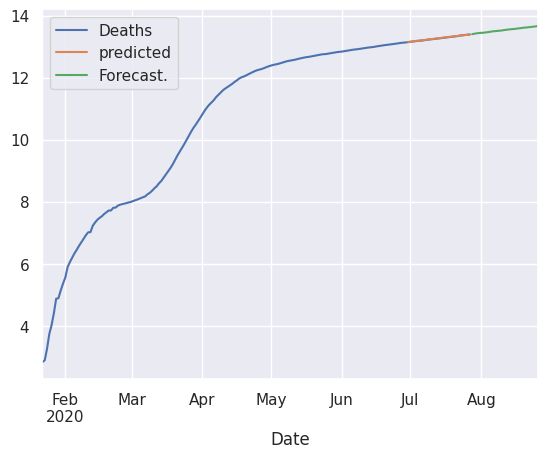

In [ ]:
##PLOTTING FOR CONFIRMED, PREDICTED AND FORECASTED VALUES

log_data[['Deaths','predicted']].plot()
forecast_values.plot(label='Forecast.')
plt.legend(loc='best')
plt.show()

In [ ]:
#CHECKING ACCURACY OF MODEL

from sklearn.metrics import mean_squared_error,r2_score

print('Root_mean_sqaured_error is.')
print(np.sqrt(mean_squared_error(log_data['Deaths'].tail(28),log_data['predicted'].tail(28))))

print('Accuracy of model is.')
r2_score(log_data['Deaths'].tail(28),log_data['predicted'].tail(28))

Root_mean_sqaured_error is.
0.005500424194517516
Accuracy of model is.


0.9944669767403821

# PREDICTING ACTIVE COUNTS USING SARIMA MODEL.

In [ ]:
active= pd.DataFrame(data.groupby('Date')['Active'].sum())

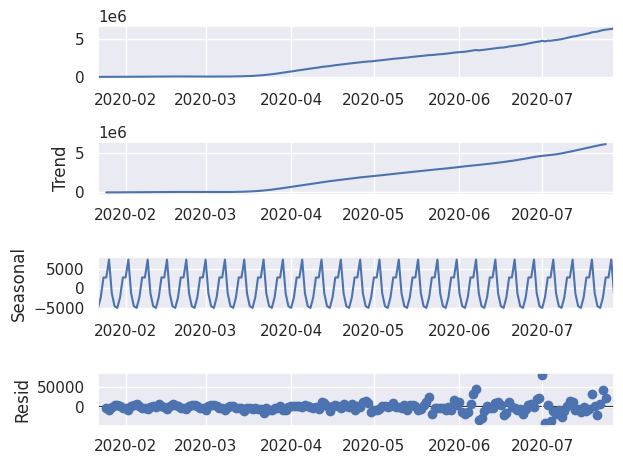

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result= seasonal_decompose(active)
decompose_result.plot()
plt.show()

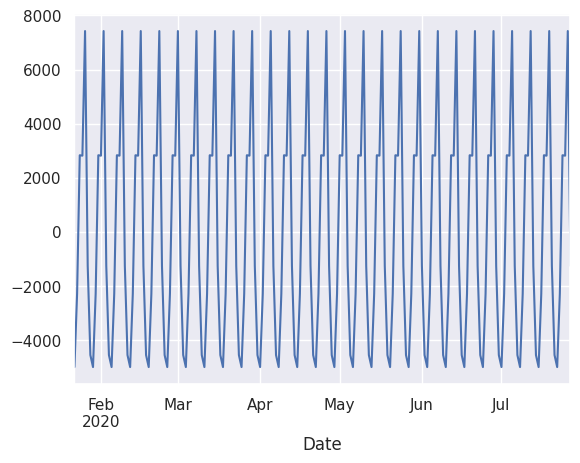

In [ ]:
decompose_result.seasonal.plot()
plt.show()

In [ ]:
##SEASONALITY=7 OR  8

In [ ]:
mean_= active.rolling(window=8).mean()
std_= active.rolling(window=8).std()

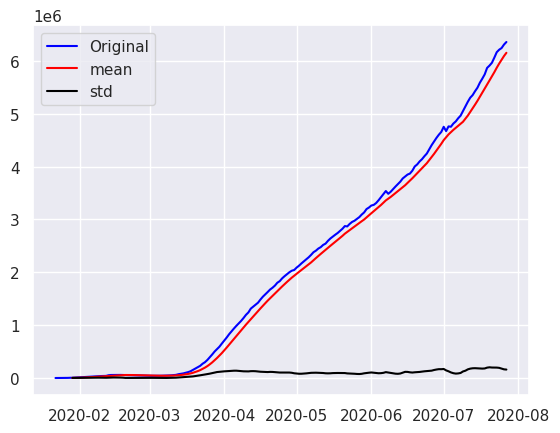

In [ ]:
plt.plot(active,color='blue',label='Original')
plt.plot(mean_,color='red',label='mean')
plt.plot(std_,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.
from statsmodels.tsa.stattools import adfuller
result = adfuller(active)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.9980591751830228
The series is not stationary


In [ ]:

##OUR DATA IS NOT STATIONARY , WE WILL MAKE IT STATIONARY BY USING LOG METHOD.

In [ ]:
log_data= np.log(active)

log_mean= log_data.rolling(window=8).mean()
log_std= log_data.rolling(window=8).std()

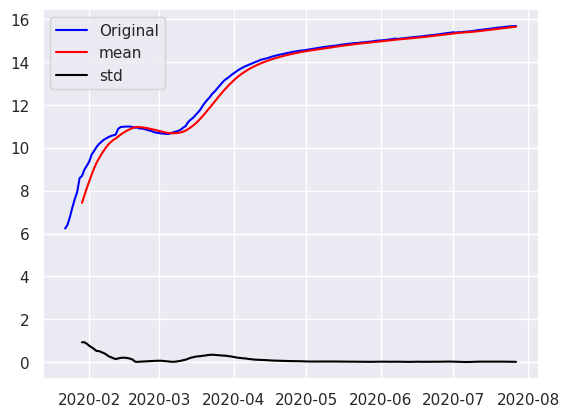

In [ ]:

plt.plot(log_data,color='blue',label='Original')
plt.plot(log_mean,color='red',label='mean')
plt.plot(log_std,color='black',label='std')
plt.legend(loc='best')
plt.show()

In [ ]:
##USING AD-FULLER TEST  TO CHECK FOR STATIONARY.

from statsmodels.tsa.stattools import adfuller
result = adfuller(log_data)
print(result[1])

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

0.007299860146008634
series is stationary


In [ ]:
train= log_data.iloc[:160]['Active']
test= log_data.iloc[160:]['Active']

# ITERTOOLS TO FIND BEST VALUE OF P,D,Q

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics  import mean_squared_error


p= range(0,8)
q= range(0,8)
d= range(0,2)

In [ ]:
pdq_combination=list(itertools.product(p,d,q))

In [ ]:
rmse=[]
order=[]
for i in pdq_combination:
        model = SARIMAX(train,order=i)
        model_fit= model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1)
        error = np.sqrt(mean_squared_error(test, pred))
        order.append(i)
        rmse.append(error)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so infe

In [ ]:
log_data1=log_data.copy()

In [ ]:
result= pd.DataFrame(index=order,data=rmse,columns=['Rmse_score'])

In [ ]:
 #OPTIMAL VALUE OF P,D,Q

result.sort_values(by='Rmse_score').head()

,Rmse_score
"(1, 1, 4)",0.022233
"(1, 1, 3)",0.023090
"(3, 1, 0)",0.023173
"(2, 1, 4)",0.023273
"(2, 1, 3)",0.023364


In [ ]:
#CALLING THE MODEL.

model=SARIMAX(train , order=(3,1,0), seasonal_order=(3,1,0,7))
model_fit=model.fit()
log_data['predicted']=model_fit.predict(start=len(train)-120,end=len(train)+len(test)-1,dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [ ]:
model=model.fit()

In [ ]:
log_data['predicted']=model.predict(start=len(train), end=len(train)+len(test)-1)

[]

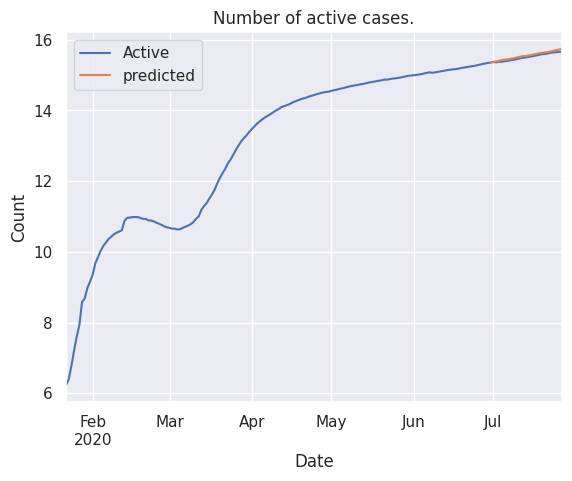

In [ ]:
#PLOTTING FOR ACTUAL NUMBER OF CASES AND PREDICTED VALUE.

log_data[['Active','predicted']].plot()
plt.ylabel('Count')
plt.title('Number of active cases.')
plt.plot()

In [ ]:
#FORECASTING NUMBER OF ACTIVE CASES FOR NEXT 30 DAYS
model1= SARIMAX(log_data1,order=(3,1,0),seasonal_order=(3,1,0,7))
model1=model1.fit()
forecast=model1.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
forecast

2020-07-28    15.666893
2020-07-29    15.679957
2020-07-30    15.675970
2020-07-31    15.681769
2020-08-01    15.677978
2020-08-02    15.684957
2020-08-03    15.687839
2020-08-04    15.688920
2020-08-05    15.696652
2020-08-06    15.697281
2020-08-07    15.703661
2020-08-08    15.703797
2020-08-09    15.709042
2020-08-10    15.711219
2020-08-11    15.713905
2020-08-12    15.719789
2020-08-13    15.722490
2020-08-14    15.729169
2020-08-15    15.732205
2020-08-16    15.741727
2020-08-17    15.743187
2020-08-18    15.746479
2020-08-19    15.754057
2020-08-20    15.762069
2020-08-21    15.767173
2020-08-22    15.769973
2020-08-23    15.778105
2020-08-24    15.780543
2020-08-25    15.781607
2020-08-26    15.789970
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
index_future_dates= pd.date_range(start='2020-07-28', end='2020-08-26')

[]

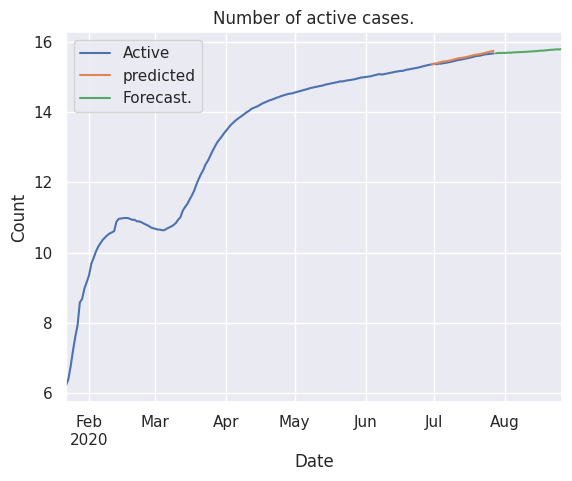

In [ ]:
#PLOTTING FOR ACTUAL ACTIVE , PREDICTED  AND FORECASTED CASES.
log_data[['Active','predicted']].plot()
forecast.plot(label='Forecast.')
plt.legend(loc='best')
plt.ylabel('Count')
plt.title('Number of active cases.')
plt.plot()

In [ ]:
#USING ANTI-LOG TO GET THE ACTUAL COUNT OF THE FORECASTED VALUES.

import math
actual=[]
for i in forecast:
  a=math.exp(i)
  actual.append(a)

actual=pd.Series(actual)
actual= (actual).astype(int)
actual.index=index_future_dates


actual

2020-07-28    6368620
2020-07-29    6452363
2020-07-30    6426688
2020-07-31    6464062
2020-08-01    6439603
2020-08-02    6484707
2020-08-03    6503422
2020-08-04    6510456
2020-08-05    6560988
2020-08-06    6565117
2020-08-07    6607135
2020-08-08    6608035
2020-08-09    6642785
2020-08-10    6657265
2020-08-11    6675165
2020-08-12    6714563
2020-08-13    6732721
2020-08-14    6777837
2020-08-15    6798450
2020-08-16    6863496
2020-08-17    6873517
2020-08-18    6896188
2020-08-19    6948643
2020-08-20    7004541
2020-08-21    7040384
2020-08-22    7060124
2020-08-23    7117770
2020-08-24    7135143
2020-08-25    7142738
2020-08-26    7202722
Freq: D, dtype: int64

In [ ]:
#CHECKING ACCURACY OF MODEL

from sklearn.metrics import mean_squared_error,r2_score

print('Root_mean_sqaured_error is.')
np.sqrt(mean_squared_error(log_data['Active'].tail(28),log_data['predicted'].tail(28)))

print('Accuracy of model is.')
r2_score(log_data['Active'].tail(28),log_data['predicted'].tail(28))

Root_mean_sqaured_error is.
Accuracy of model is.


0.8057958838395126